In [1]:
from pyspark import SparkContext


In [2]:
import pandas

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("big data").config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [4]:
df2 = spark.read.option("header",True).csv('/home/usharaff/Downloads/202110-capitalbikeshare-tripdata.csv')

In [5]:
df1 = spark.read.option("header",True).csv('/home/usharaff/Downloads/202101-capitalbikeshare-tripdata.csv')


In [6]:
df1.count()

100070

In [7]:
df2.count()

328300

In [8]:
df1.columns

['ride_id',
 'rideable_type',
 'started_at',
 'ended_at',
 'start_station_name',
 'start_station_id',
 'end_station_name',
 'end_station_id',
 'start_lat',
 'start_lng',
 'end_lat',
 'end_lng',
 'member_casual']

+-------------+-----+
|member_casual|count|
+-------------+-----+
|       casual|33387|
|       member|66683|
+-------------+-----+



<AxesSubplot:xlabel='member_casual'>

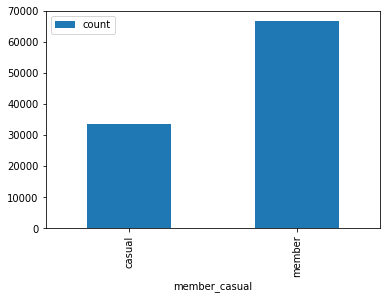

In [9]:
a=df1.groupBy("member_casual").count()
a.show()
a.toPandas().plot.bar(x="member_casual", y="count")



+-------------+------+
|member_casual| count|
+-------------+------+
|       casual|127703|
|       member|200597|
+-------------+------+



<AxesSubplot:xlabel='member_casual'>

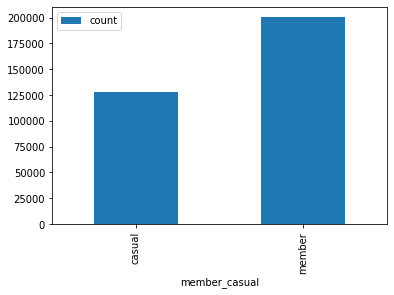

In [10]:
b=df2.groupBy("member_casual").count()
b.show()
b.toPandas().plot.bar(x="member_casual", y="count")


In [11]:
c=df1.groupBy("start_station_name","end_station_name").count().toPandas()


In [12]:
c.sort_values(by='count', ascending=False).dropna()[:10]

,start_station_name,end_station_name,count
378,Jefferson Dr & 14th St SW,Jefferson Dr & 14th St SW,100
9971,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,98
7116,Hains Point/Buckeye & Ohio Dr SW,Hains Point/Buckeye & Ohio Dr SW,86
12560,1st & M St NE,1st & M St NE,86
24774,Gravelly Point,Gravelly Point,80
2392,Anacostia Park,Anacostia Park,77
9900,4th St & Madison Dr NW,4th St & Madison Dr NW,68
25563,Thomas Circle,Thomas Circle,63
17662,New Hampshire Ave & T St NW,New Hampshire Ave & T St NW,61
27060,14th & L St NW,14th & L St NW,59


In [13]:
d=df2.groupBy("start_station_name","end_station_name").count().toPandas()
d.sort_values(by='count', ascending=False).dropna()[:10]

,start_station_name,end_station_name,count
16063,Smithsonian-National Mall / Jefferson Dr & 12t...,Smithsonian-National Mall / Jefferson Dr & 12t...,484
23741,1st & M St NE,New Jersey Ave & F St NW,467
824,Jefferson Dr & 14th St SW,Jefferson Dr & 14th St SW,466
19903,4th St & Madison Dr NW,4th St & Madison Dr NW,397
30662,New Jersey Ave & F St NW,1st & M St NE,373
1716,15th St & Constitution Ave NW,15th St & Constitution Ave NW,315
20243,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,302
53909,Henry Bacon Dr & Lincoln Memorial Circle NW,Henry Bacon Dr & Lincoln Memorial Circle NW,270
54295,Lincoln Memorial,Lincoln Memorial,267
50269,Gravelly Point,Gravelly Point,266


In [14]:
e=df1.groupBy("rideable_type").count().toPandas()
e.set_index('rideable_type', inplace=True)

<AxesSubplot:ylabel='count'>

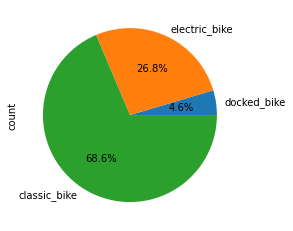

In [15]:
e.plot.pie(y='count',legend=False,autopct='%1.1f%%')

In [16]:
f=df2.groupBy("rideable_type").count().toPandas()
f.set_index('rideable_type', inplace=True)

<AxesSubplot:ylabel='count'>

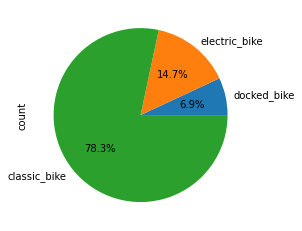

In [17]:
f.plot.pie(y='count',legend=False,autopct='%1.1f%%')